# Workshop Activity: Creating a Balanced Spectroscopic Dataset

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
## Uncomment the following only if the Astro Data Lab client is not already installed
#!pip install --upgrade astro-datalab

In [3]:
## Uncomment the following only if SPARCL client is not already installed
#!pip install --upgrade sparclclient

In [4]:
# import some helpful python packages
import numpy as np
from astropy.table import vstack
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

## DataLab and SPARCL related modules
from sparcl.client import SparclClient

path = './data/'

# plots default setup
plt.rcParams['font.size'] = 14
# Axes width
width = {'linewidth':1.5}
plt.rc('axes', **width)
# x- and y- ticks
ticks = {'major.size':5.0, 'minor.size':3.0, 'major.width':1.5, 'minor.width':1., 'direction':'in',\
        'minor.visible':True}
plt.rc('xtick', **ticks)
plt.rc('ytick', **ticks)

In [5]:
## Instantiate SPARCLClient
client = SparclClient()

announcement=Data set deprecation warning: SDSS/BOSS DR16 will be replaced with SDSS/BOSS DR17 starting on or after November 1, 2025


In [6]:
path = '/content/drive/MyDrive/John/Work/Tec/02_Research/MACSS/2025/data'
path = './data/'
zpix_cat = Table.read(f'{path}/zcat.ecsv')

In [7]:
print(f"The resulting table has {len(zpix_cat)} rows, and comprises 10% of the sample size")
zpix_cat[0:5]

The resulting table has 1032144 rows, and comprises 10% of the sample size


targetid,survey,program,desi_target,z,zwarn,spectype,desiname
int64,str4,str6,int64,float64,int64,str6,str22
39628129664239940,main,dark,65537,0.6129316573380434,0,GALAXY,DESI J234.7166+14.2776
39627660451645263,main,dark,917542,2.274544489801376,0,QSO,DESI J146.5058-05.3615
39632981819656750,main,dark,1028,3.026060340852765,0,QSO,DESI J250.8452+34.9668
39628310233219875,main,dark,65537,0.5896048730671053,0,GALAXY,DESI J036.7545+22.2632
39627715627715582,main,dark,655394,1.541882595749106,0,GALAXY,DESI J201.3880-02.9397


In [8]:
## Check that rows have unique TARGETIDs (only one PRIMARY spectrum per object)
Ntot = len(zpix_cat)
print(f"Total N(rows) : {Ntot}")
print(f"N(rows) with unique TARGETIDs : {len(np.unique(zpix_cat['targetid']))}")

Total N(rows) : 1032144
N(rows) with unique TARGETIDs : 1032144


In [9]:
## Check the spectral types
spectypes = np.unique(zpix_cat['spectype'])

for spectype in spectypes:
    Nspectype = len(zpix_cat[zpix_cat['spectype']==spectype])
    # Percentage rounded to 1 decimal
    percent = np.round(Nspectype/Ntot*100, 1)
    print(f"SPECTYPE={spectype} includes N={Nspectype} ({percent}%)")

SPECTYPE=GALAXY includes N=740089 (71.7%)
SPECTYPE=QSO includes N=82815 (8.0%)
SPECTYPE=STAR includes N=209240 (20.3%)


In [10]:
## Function to check the bits

def check_bits(table, bit):
    """
    Function to check the bits corresponding to the main target classes.

    Parameters
    ----------
    table : astropy table
        Table of DESI targets with required sv*desi_target columns

    bit : int
        Target bit from DESI

    Returns
    -------
    res : numpy array
        Boolean array corresponding to the bit
    """
    # Targeting information about the DESI targeting is stored in the different desi_target columns
    desi_tgt = table['desi_target']

    # If notebook is modified to use the SV data, need to query the sv*_desi_target
    # columns and uncomment the code below
#    sv1_desi_tgt = table['sv1_desi_target']
#    sv2_desi_tgt = table['sv2_desi_target']
#    sv3_desi_tgt = table['sv3_desi_target']

    val = (2**bit)

    # Apply the selection
    res = desi_tgt & val != 0

    # Version for SV and Main data below (if notebook is modified accordingly)
#    res = (desi_tgt & val != 0)|(sv1_desi_tgt & val != 0)|(sv2_desi_tgt & val != 0)|(sv3_desi_tgt & val != 0)

    return (res)

In [11]:
## Selecting candidates -
## Target bits from DESI:
## 1. BGS: bit 60
## 2. LRG: bit 0
## 3. ELG: bit 1
## 4. QSO: bit 2
## 5. MWS: bit 61
## 6. Secondary Targets: bit 62

is_bgs = check_bits(zpix_cat, 60)
is_lrg = check_bits(zpix_cat, 0)
is_elg = check_bits(zpix_cat, 1)
is_qso = check_bits(zpix_cat, 2)
is_mws = check_bits(zpix_cat, 61)
is_scnd = check_bits(zpix_cat, 62)

In [12]:
# Number of sources of each target type
n_bgs = len(zpix_cat[is_bgs])
n_lrg = len(zpix_cat[is_lrg])
n_elg = len(zpix_cat[is_elg])
n_qso = len(zpix_cat[is_qso])
n_mws = len(zpix_cat[is_mws])
n_scnd = len(zpix_cat[is_scnd])

In [18]:
# Selecting n_qso/500 random objects from each category
N = 500
bgs_indices = np.random.choice(np.where(is_bgs)[0], size=int(n_qso/N), replace=False)
lrg_indices = np.random.choice(np.where(is_lrg)[0], size=int(n_qso/N), replace=False)
elg_indices = np.random.choice(np.where(is_elg)[0], size=int(n_qso/N), replace=False)
mws_indices = np.random.choice(np.where(is_mws)[0], size=int(n_qso/N), replace=False)
qso_indices = np.random.choice(np.where(is_qso)[0], size=int(n_qso/N), replace=False)

bgs_subset = zpix_cat[bgs_indices]
lrg_subset = zpix_cat[lrg_indices]
elg_subset = zpix_cat[elg_indices]
mws_subset = zpix_cat[mws_indices]
qso_subset = zpix_cat[qso_indices]

# Concatenate the subsets
combined_subset = vstack([bgs_subset, lrg_subset, elg_subset, mws_subset, qso_subset])

# Display the length of the combined subset
print(len(combined_subset))

1125


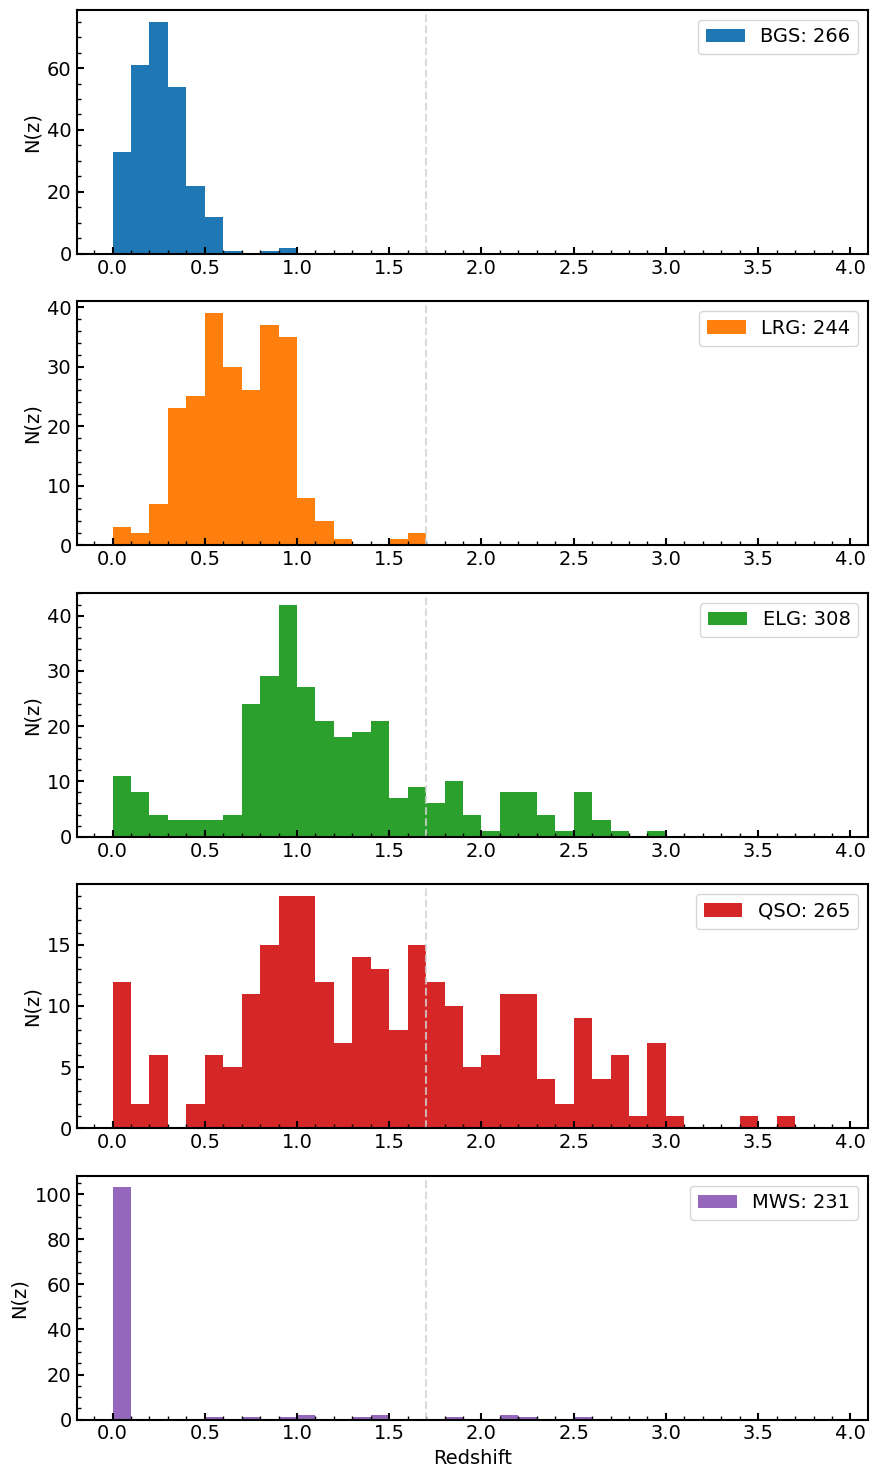

In [19]:
# Now let us look at the distribution of redshifts of the combined subset -
fig, axs = plt.subplots(5, 1, figsize = (9, 15))

# Define the redshift bins for the histograms
bins = np.arange(0, 4, 0.1)

is_bgs_subset = check_bits(combined_subset, 60)
is_lrg_subset = check_bits(combined_subset, 0)
is_elg_subset = check_bits(combined_subset, 1)
is_qso_subset = check_bits(combined_subset, 2)
is_mws_subset = check_bits(combined_subset, 61)

# Will iterate over these 5 target classes in the combined subset
targets_subset = [is_bgs_subset, is_lrg_subset, is_elg_subset, is_qso_subset, is_mws_subset]
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
labels = [f'BGS: {len(combined_subset[is_bgs_subset]):,}',
          f'LRG: {len(combined_subset[is_lrg_subset]):,}',
          f'ELG: {len(combined_subset[is_elg_subset]):,}',
          f'QSO: {len(combined_subset[is_qso_subset]):,}',
          f'MWS: {len(combined_subset[is_mws_subset]):,}']

for i, target_subset in enumerate(targets_subset):
    axs[i].hist(combined_subset['z'][target_subset], color=colors[i], bins=bins, label=labels[i])
    axs[i].legend(fontsize=14)
    axs[i].set_ylabel("N(z)")

    # Vertical line at the limit for GALAXY spectype
    axs[i].axvline(1.7, ls='--', color='lightgrey', alpha=0.8)

# Add x-label on the last panel
axs[4].set_xlabel("Redshift");

plt.tight_layout()

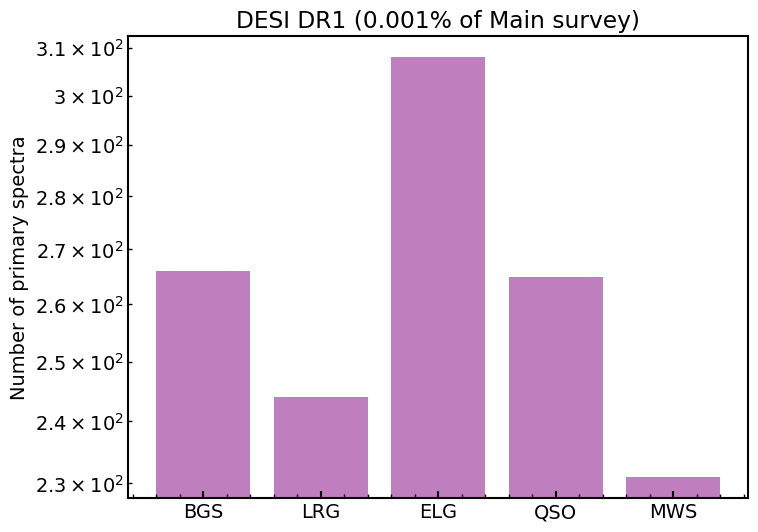

In [20]:
# Let us look at the numbers visually -
n_bgs_subset = len(combined_subset[is_bgs_subset])
n_lrg_subset = len(combined_subset[is_lrg_subset])
n_elg_subset = len(combined_subset[is_elg_subset])
n_qso_subset = len(combined_subset[is_qso_subset])
n_mws_subset = len(combined_subset[is_mws_subset])

plt.figure(figsize = (8,6))

targets = ['BGS', 'LRG', 'ELG', 'QSO', 'MWS']
numbers = [n_bgs_subset, n_lrg_subset, n_elg_subset, n_qso_subset, n_mws_subset]

plt.bar(targets, numbers, color = 'purple', alpha = 0.5)
plt.ylabel('Number of primary spectra')
plt.yscale('log')
plt.title(f'DESI DR1 ({0.5/N}% of Main survey)');

In [21]:
combined_subset_df = combined_subset.to_pandas()
primary_spectra_data = []

In [22]:
primary_spectra_info = []
primary_spectra_flux = {}

# Get all targetids at once
targetid_list = combined_subset_df['targetid'].astype(int).tolist()
inc = ['specid', 'redshift', 'flux', 'wavelength', 'spectype', 'desiname', 'specprimary', 'survey', 'program', 'targetid', 'redshift_warning']

# Single API call for all targetids
res = client.retrieve_by_specid(specid_list=targetid_list, include=inc, dataset_list=['DESI-DR1'])

primary_spectra_info = []
primary_spectra_flux = {}

if res.records:
    # Group records by targetid for easier processing
    records_by_targetid = {}
    for record in res.records:
        targetid = record.targetid
        if targetid not in records_by_targetid:
            records_by_targetid[targetid] = []
        records_by_targetid[targetid].append(record)

    # Process each targetid
    for targetid, records in records_by_targetid.items():
        # Find the primary spectrum
        primary_record = None
        for record in records:
            if record.specprimary:
                primary_record = record
                break

        # If no primary found, use the first record as fallback
        if not primary_record and records:
            primary_record = records[0]

        if primary_record:
            # Store information and flux for the primary spectrum
            primary_spectra_info.append({
                'targetid': targetid,
                'specid': primary_record.specid,
                'redshift': primary_record.redshift
            })
            primary_spectra_flux[targetid] = primary_record.flux.tolist()

# Create a DataFrame from the primary spectra information
primary_spectra_df = pd.DataFrame(primary_spectra_info)

# Merge with the original combined_subset_df to include other columns
combined_data_with_spectra_info = pd.merge(combined_subset_df, primary_spectra_df, on='targetid', how='left')

combined_data_with_spectra_info.dropna(inplace=True)

# Save the combined tabular data to a CSV file
combined_data_with_spectra_info.to_csv(f'{path}/balanced_spectra_features.csv', index=False)


def save_flux_dict_to_npz(flux_dict, filepath):
    """Save flux dictionary to NumPy .npz file"""
    # Convert to arrays
    targetids = np.array(list(flux_dict.keys()))
    flux_arrays = [np.asarray(flux) for flux in flux_dict.values()]
    
    # Save with metadata
    np.savez(filepath, 
             targetids=targetids, 
             flux_arrays=flux_arrays,
             allow_pickle=True)
    
    print(f"Saved {len(flux_dict)} spectra to {filepath}")

save_flux_dict_to_npz(primary_spectra_flux, f'{path}/balanced_spectra_flux.npz')

Saved 492 spectra to ./data//balanced_spectra_flux.npz
